In [ ]:
#Revision Exersice for MachineLearning

In [29]:
# Load the data from the credit_data.csv file into a variable named 'input_data'. 
# Print the dimensionality of your input DataFrame and preview the data. 
# Take a minute to understand your features, their types and detect the dependent/target variable 

input_data = pd.read_csv("./credit_data.csv")
print(input_data.shape)
input_data.head(15)

(4000, 10)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [30]:
# Drop any duplicate rows in the data. Optional: perform sanity checks to ensure your changes have gone through
input_data.drop_duplicates(inplace = True)
input_data.shape

(1006, 10)

In [31]:
# Get the relevant information on the data types and non-null counts of your input DataFrame.  
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 0 to 1224
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1006 non-null   int64 
 1   Sex               1006 non-null   object
 2   Job               1006 non-null   int64 
 3   Housing           1006 non-null   object
 4   Saving accounts   822 non-null    object
 5   Checking account  609 non-null    object
 6   Credit amount     1006 non-null   int64 
 7   Duration          1006 non-null   int64 
 8   Purpose           1006 non-null   object
 9   Risk              1006 non-null   object
dtypes: int64(4), object(6)
memory usage: 86.5+ KB


In [ ]:
##### COMMENT HERE - What do you observe wrt the data types? How do you intend to address this issue later on in your analysis? 
##### Are there any specific techniques you would consider? 

# We dont have any "strings". So, our dependent variable (y) will be the column "Risk" and all the others must be
# converted/encoded to numerical ones, so that we can feed/train out models later.



In [32]:
# Check for missing values per column; return either True/False, counts or percentages of missing values per column 
input_data.isnull().sum()


Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     184
Checking account    397
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
##### COMMENT HERE - What do you observe? Are there any NULL/NA values? If so, in which features? 
##### How do you intend to address this issue later on in your analysis? Are there any techniques you would consider? 


# There are missing values in columns "Saving accounts" and "Cheching accounts". 
# We can either drop the missing values (naive) or impute them with the help of an imputer (e.g: SimpleImputer) and 
# select the strategy of the imputation.


### Exploratory Data Analysis (EDA) 

#### a) Dependent variable - check the frequencies 

In [37]:
# Get the class frequencies/counts of the target variable from your input_data in a tabular format 

input_data["Risk"].value_counts()


good    705
bad     301
Name: Risk, dtype: int64

In [ ]:
##### COMMENT HERE - What do you observe? Why is this important to factor in when building a ML model? 

# There is a significant imbalance in our dependent variable. This is not good for our models, because this tends to affect the 
# generalization capability of our models. 


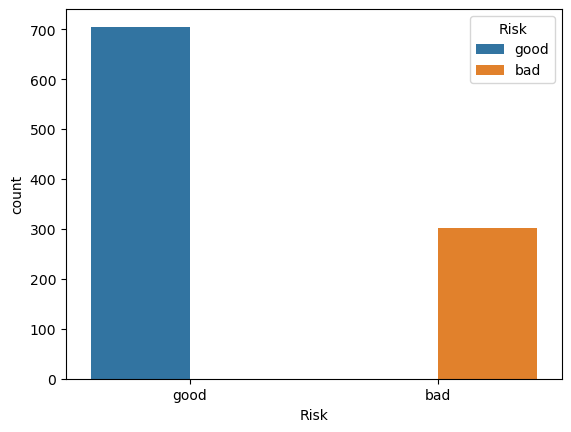

In [38]:
# Visualize the class frequencies/counts of the target variable from your input_data using a plot  
sns.countplot(x="Risk", hue="Risk", data=input_data);

#### b) Numerical features - Summary statistics

In [40]:
# Check the summary statistics (5-number summary) of your input (numerical) data in a tabular format  
summ_st = input_data.describe()
summ_st

,Age,Job,Credit amount,Duration
count,1006.00,1006.00,1006.00,1006.00
mean,35.79,1.90,3270.22,21.13
std,12.45,0.65,2817.91,12.83
min,5.00,0.00,250.00,4.00
25%,27.00,2.00,1367.25,12.00
50%,33.00,2.00,2321.50,18.00
75%,42.00,2.00,3972.75,24.00
max,150.00,3.00,18424.00,120.00


In [ ]:
##### COMMENT HERE - What can you infer from the information provided in this table and summary? 

# From the summary statistic above we can see that our data needs to be scaled, in order for our number range
# to be standardized in a fixed number range. 

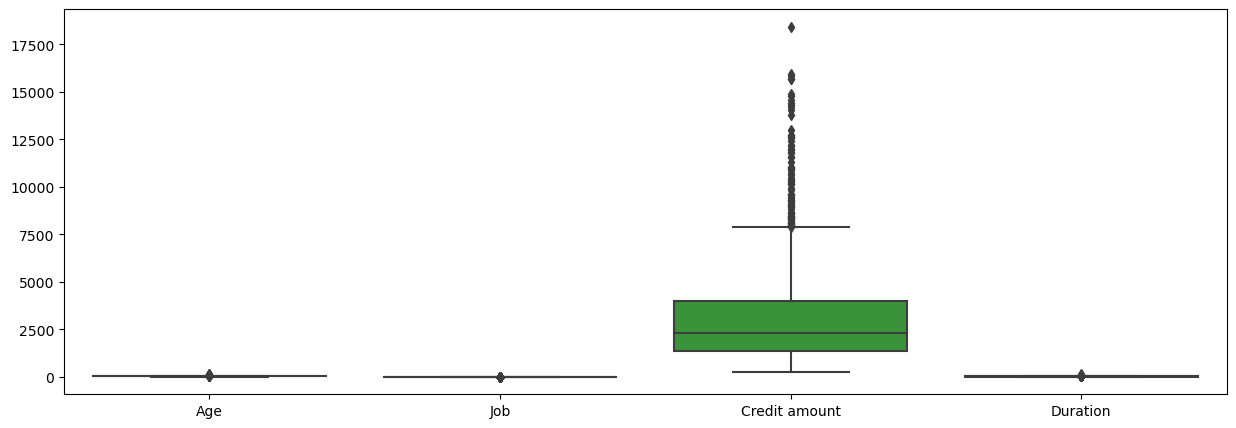

In [43]:
# Visualize the summary statistics (5-number summary) of your input (numerical) data in a boxplot  
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=input_data)
ax.set_xticklabels(ax.get_xticklabels())
plt.show();

#### c) Feature correlation & heatmap 

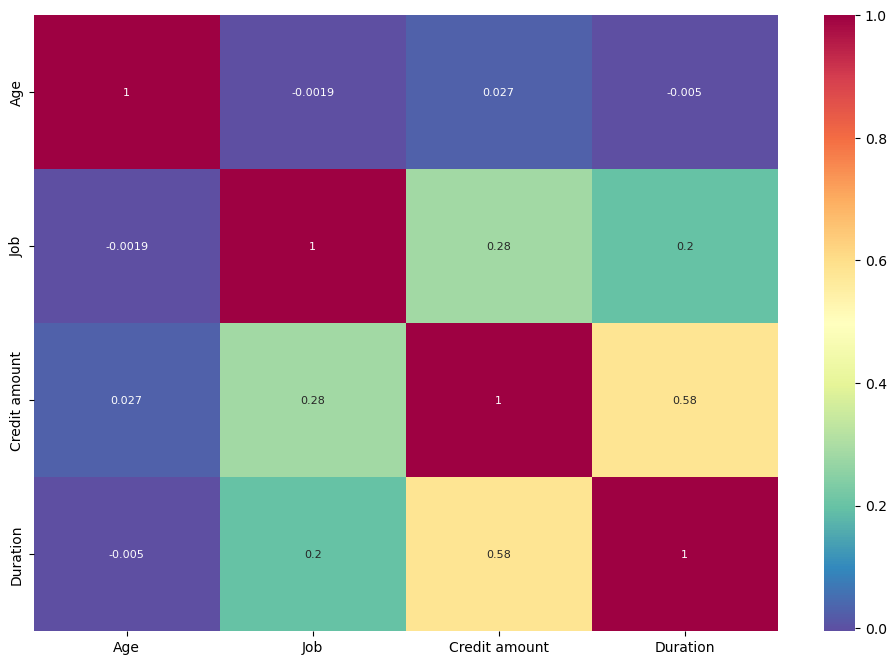

In [49]:
# Calculate the Pearson correlation coefficients of only the numerical features in your input_data 
# Plot the correlation coefficients in a heatmap.  

corr = input_data.corr(method = 'pearson')
corr

f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, 
            annot=True, 
            annot_kws={'size': 8}, 
            cmap="Spectral_r");

In [ ]:
##### COMMENT HERE - Mention one combination of correlated features that you observe in your heatmap
##### Specify briefly if the correlated features are positively or negatively correlated, and what that means.  

# A highly correlated pair of values are "Credit amount" and "Duration". Those values are positively correlated and this
# means that if "Credit amount" increases then "Duration" will increase too. 


### Data mining and pre-processing 

#### a) Filtering

In [58]:
# Filtering: keep only the rows from input_data where:  
# a person's age is above 18 AND less than 90, AND the Duration is less or equal to 80  
# You can perform this filtering in one or more steps (various solutions available). 
# Optional: sanity check: print the dimensionality before and after to ensure your changes have gone through successfully 

input_data = input_data[input_data['Age']>18]
input_data = input_data[input_data['Age']<90]
input_data = input_data[input_data["Duration"]<=80]

print(input_data.shape)
input_data.head()

(1000, 10)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


#### b) Split to dependent and independent variables

In [64]:
# Split to the dependent and indepentent variables, and print their respective dimensions. 
# Perform any other necessary steps at this stage that you may see fit before proceeding with your analysis.  

# X = independent, y= dependent

X = input_data.drop('Risk', axis = 1)
y = input_data['Risk']

print("X:",X.shape,"\n","y:",y.shape)

X: (1000, 9) 
 y: (1000,)


In [66]:
##### COMMENT HERE - Comment briefly on any other actions you may have taken at this stage and justify why  

le = LabelEncoder()
y=le.fit_transform(y)

# We fit_trasnform a labelEncoder to our dependent variable in order to convert it to numerical values with 
# values of 0 or 1. This is the classification that our models will have to do later. 

#### c) Holdout validation

In [67]:
# Apply a train/test split with a 70:30 ratio. Use random_state=0 when splitting for reproducibility. 
# Set any other parameters you may consider appropriate for this particular use case based on your current findings. 
# Print the shapes of your X/y train/test sets.  

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,stratify = y,random_state=0)

print("Our Train set:",X_train.shape, y_train.shape)
print("Our Test set:", X_test.shape, y_test.shape)

Our Train set: (700, 9) (700,)
Our Test set: (300, 9) (300,)


In [ ]:
# COMMENT HERE: Why is the holdout validation technique important? 
# Mention any additional parameters you may have set in your split above and justify why

# This validation technique is important because it can perform in high variance datasets, but it demands for adequate number 
# of samples. In our case, I chose the Stratified Holdout (stratify=y) which ensures each class (0/1) is represented with
# approximately equal proportions in both subsets. 

#### Imputing 

In [74]:
# OPTIONAL: sanity check: print the NAs per train/test dataset before the imputing
print("X_train:","\n",X_train.isnull().sum(),"\n"*2)
print("X_test:","\n",X_test.isnull().sum())

X_train: 
 Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     132
Checking account    279
Credit amount         0
Duration              0
Purpose               0
dtype: int64 


X_test: 
 Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts      51
Checking account    115
Credit amount         0
Duration              0
Purpose               0
dtype: int64


In [77]:
# OPTIONAL: return the data types once more per column; this may help in the next step
print(X_train.dtypes)
X_test.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object


Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [80]:
# PROXEIRO GIA EMENA
print(X_train['Saving accounts'].value_counts())
print(X_train['Checking account'].value_counts())

little        413
moderate       71
quite rich     43
rich           41
Name: Saving accounts, dtype: int64
moderate    193
little      181
rich         47
Name: Checking account, dtype: int64


In [85]:
# Handle the missing values: impute the missing values with a strategy of your choice. 

# If and only if you get stuck with the imputing, you can drop any rows that contain NAs

imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

X_train[['Saving accounts', 'Checking account']] = imp_cat.fit_transform(X_train[['Saving accounts', 'Checking account']])
X_test[['Saving accounts', 'Checking account']]  = imp_cat.transform(X_test[['Saving accounts', 'Checking account']])

# Sanity check
print(X_train['Saving accounts'].value_counts())
print(X_train['Checking account'].value_counts())

little        545
moderate       71
quite rich     43
rich           41
Name: Saving accounts, dtype: int64
moderate    472
little      181
rich         47
Name: Checking account, dtype: int64


In [ ]:
##### COMMENT HERE - Briefly explain any strategy or strategies you may have used

# Since our two columns that have the missing values are dtype = object, we use the SimpleImputer with the strategy equal to 
# "most frequent". This will fit_transform our X_train, and only transform our X_test into non-missing values sets.


In [87]:
# OPTIONAL: sanity check: print the NAs per train/test dataset after the Imputing - should all be ZEROS
print(X_train.isnull().sum())
X_test.isnull().sum()


Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64


Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

#### Encode the categorical variables

In [88]:
# OPTIONAL: return the data types once more per column to conduct the next step 
print(X_train.dtypes)
X_test.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object


Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [89]:
# Encode the categorical features with One Hot Encoding (zeros and ones).
# If and only if you get stuck with the encoding, drop the categorical features.  
# Sanity check: preview your results and ensure they look as expected before moving on! 

X_train_ohe = X_train[['Sex', 'Housing','Saving accounts','Checking account','Purpose']]
X_train_ohe = pd.get_dummies(X_train_ohe, dtype=int)

X_train = X_train.drop(['Sex', 'Housing','Saving accounts','Checking account','Purpose'], axis = 1)
X_train = X_train.join(X_train_ohe)

X_train.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
771,25,3,8065,36,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
343,33,3,4439,18,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
803,35,2,976,12,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
478,39,1,1037,12,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
891,46,2,1829,15,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [90]:
# Encoding of X_test

X_test_ohe = X_test[['Sex', 'Housing','Saving accounts','Checking account','Purpose']]
X_test_ohe = pd.get_dummies(X_test_ohe, dtype=int)

X_test = X_test.drop(['Sex', 'Housing','Saving accounts','Checking account','Purpose'], axis = 1)
X_test = X_test.join(X_test_ohe)

X_test.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
922,22,2,1366,9,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
128,34,3,1860,12,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
926,21,2,1049,18,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
663,35,3,1050,6,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
118,23,2,4281,33,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0


#### Scaling

In [91]:
# Apply feature scaling with a scaler of your choice
# Optional (for plotting): convert the scaling results to a pandas DataFrame and pass as columns the columns of your initial Xtrain/Xtest data respectively  
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test  = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns) 

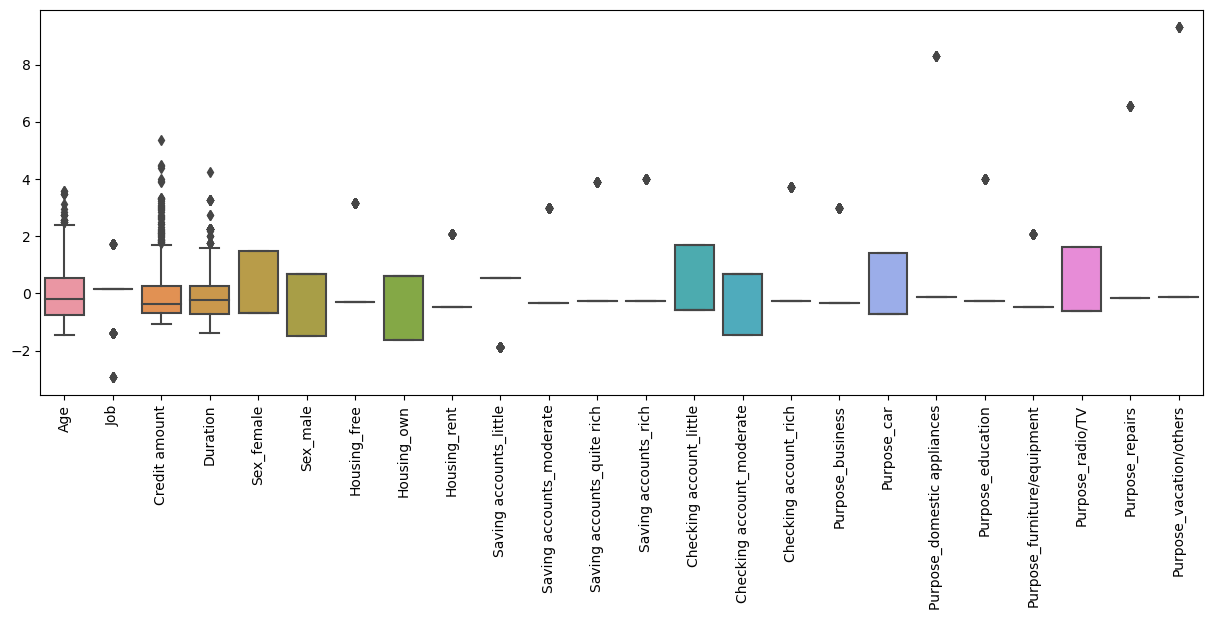

In [94]:
# Plot once more the boxplot of your scaled X_train
plt.figure(figsize=(15,5))
ax = sns.boxplot(data= X_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

## Supervised Learning - Classifiers

### Benchmark models 

Create **TWO** benchmark classification models using their **default parameters**: 

- a) one classifier has to be an ensemble model, specifically the Random Forest classifier. Use random_state=0 as a parameter in the RF
- b) the other can be any other classifier of your choice
- For both models, fit to your data and report back their performance metrics. 

In [ ]:
## You need to load any additional library/ies of the classifier of your choice that you wish to use

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC, LinearSVC 

In [96]:
#### Create a default/benchmark RF classifier 
# Fit, predict and report back the performance metrics and accuracy of the benchmark / default RF classifier
# Use random_state=0 for reproducibility 

# Default parameters of RFs = n_estimators=100,criterion=”gini”...
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(round(metrics.accuracy_score(y_test,y_pred_rf),3))
print(metrics.confusion_matrix(y_test,y_pred_rf))
print(metrics.classification_report(y_test,y_pred_rf))

0.703
[[ 30  60]
 [ 29 181]]
              precision    recall  f1-score   support

           0       0.51      0.33      0.40        90
           1       0.75      0.86      0.80       210

    accuracy                           0.70       300
   macro avg       0.63      0.60      0.60       300
weighted avg       0.68      0.70      0.68       300



In [97]:
#### Create a default/benchmark classifier of your choice 
# Fit, predict and report back the accuracy and performance metrics of the benchmark classifier of your choice

#Default parameters -> C=1.0, gamma = 'auto', kernel='rbf'
svc = SVC()
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
print(round(metrics.accuracy_score(y_test,y_pred_svc),3))
print(metrics.confusion_matrix(y_test,y_pred_svc))
print(metrics.classification_report(y_test,y_pred_svc))

0.707
[[ 18  72]
 [ 16 194]]
              precision    recall  f1-score   support

           0       0.53      0.20      0.29        90
           1       0.73      0.92      0.82       210

    accuracy                           0.71       300
   macro avg       0.63      0.56      0.55       300
weighted avg       0.67      0.71      0.66       300



### Find the optimal classifiers   

For each of your models: 
- Tune with **10-fold cross-validation** a very small number of their hyperparameters (we are not aiming for performance during the Midterm) using RandomizedSearchCV. Use only 10 iterations. 
- Use `random_state=0` for reproducibility and `n_jobs=-1` for parallelization.
- Get the best/optimal estimators (models) from tuning for each different model, fit them to your training data and print the final evaluation metrics. Compare the results between the two optimal models.|

#### Tune the classifier of your choice

In [100]:
# Tune the classifier of your choice (the one you had selected above): 

# Create a dictionary of model hyperparameters you want to feed into RandomizedSearchCV. 
# Apply RandomizedSearchCV with 10-fold cross-validation on the classifier of your choice (from above) using the dictionary of hyperparameters
# Use only 10 iterations, and set n_jobs = -1 for parallelization and random_state = 0 for reproducibility.
# Optional: play with a different scoring metric 
# Fit and report back the optimal model hyperparameters 

param_grid = [ {'C':[0.1, 1, 10, 100], 'kernel':['linear']},
               {'C':[0.1, 1, 10, 100], 'kernel':['rbf'], 'gamma':[1, 0.1, 0.01]},
               {'C':[0.1, 1, 10, 100], 'kernel':['poly'],'degree':[2,3,4] ,'gamma':[1, 0.1, 0.01]} 
             ]

RS = RandomizedSearchCV(SVC(),
                        param_distributions=param_grid,
                        scoring = 'accuracy',
                        cv = 10,
                        n_jobs = -1,
                        random_state=0)
RS.fit(X_train,y_train)
print(RS.best_params_)

{'kernel': 'linear', 'C': 10}


In [104]:
# Build the optimal model as detected by RandomizedSearchCV for the classifier of your choice 
# Report the final test accuracy and performance metrics of your optimal model 
svc_opt = RS.best_estimator_
svc_opt.fit(X_train,y_train)
y_pred_svc_opt = svc_opt.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_svc_opt))
print(metrics.confusion_matrix(y_test,y_pred_svc_opt))
print(metrics.classification_report(y_test,y_pred_svc_opt))

0.7
[[ 18  72]
 [ 18 192]]
              precision    recall  f1-score   support

           0       0.50      0.20      0.29        90
           1       0.73      0.91      0.81       210

    accuracy                           0.70       300
   macro avg       0.61      0.56      0.55       300
weighted avg       0.66      0.70      0.65       300



#### Tune the Random Forest classifier 

In [116]:
# Tune the RandomForest classifier

# Create a dictionary of model hyperparameters for your RandomForestClassifier that you want to feed into RandomizedSearchCV. 
# Apply RandomizedSearchCV with 10-fold cross-validation on the RandomForestClassifier using the dictionary of hyperparameters
# Use only 10 iterations, and set n_jobs = -1 for parallelization and random_state = 0 for reproducibility.
# Optional: play with a different scoring metric 
# Fit and report back the optimal model hyperparameters 

param_grid_rf = {'n_estimators': np.arange(10, 200, 10),
              'max_depth': [np.arange(1, 50, 2), None],
              'max_features' : ['sqrt', 'log2', None], 
              'min_samples_split': [1, 3, 5], 
              'min_samples_leaf': [1, 3, 10],
              'criterion': ['gini', 'entropy'], 
             }

cv_rf = RandomizedSearchCV(RandomForestClassifier(random_state=0), 
                           param_distributions=param_grid_rf, 
                           n_iter = 30,
                           cv = 10,
                           n_jobs = -1,
                           random_state=0
                            )

cv_rf.fit(X_train, y_train)
print(cv_rf.best_params_)

{'n_estimators': 80, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': None, 'criterion': 'gini'}


C:\Programs\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
160 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Programs\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Programs\Anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Programs\Anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Programs\Anaconda3\Lib\site-packages\sklearn\uti

In [118]:
# Build the optimal RF model as detected by RandomizedSearchCV  
# Report the final test accuracy and performance metrics of your optimal model 
rf_opt = cv_rf.best_estimator_
rf_opt.fit(X_train,y_train)
y_pred_rf_opt = rf_opt.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_rf_opt))

# Accuracy: 0.7 -> 0.73

0.73


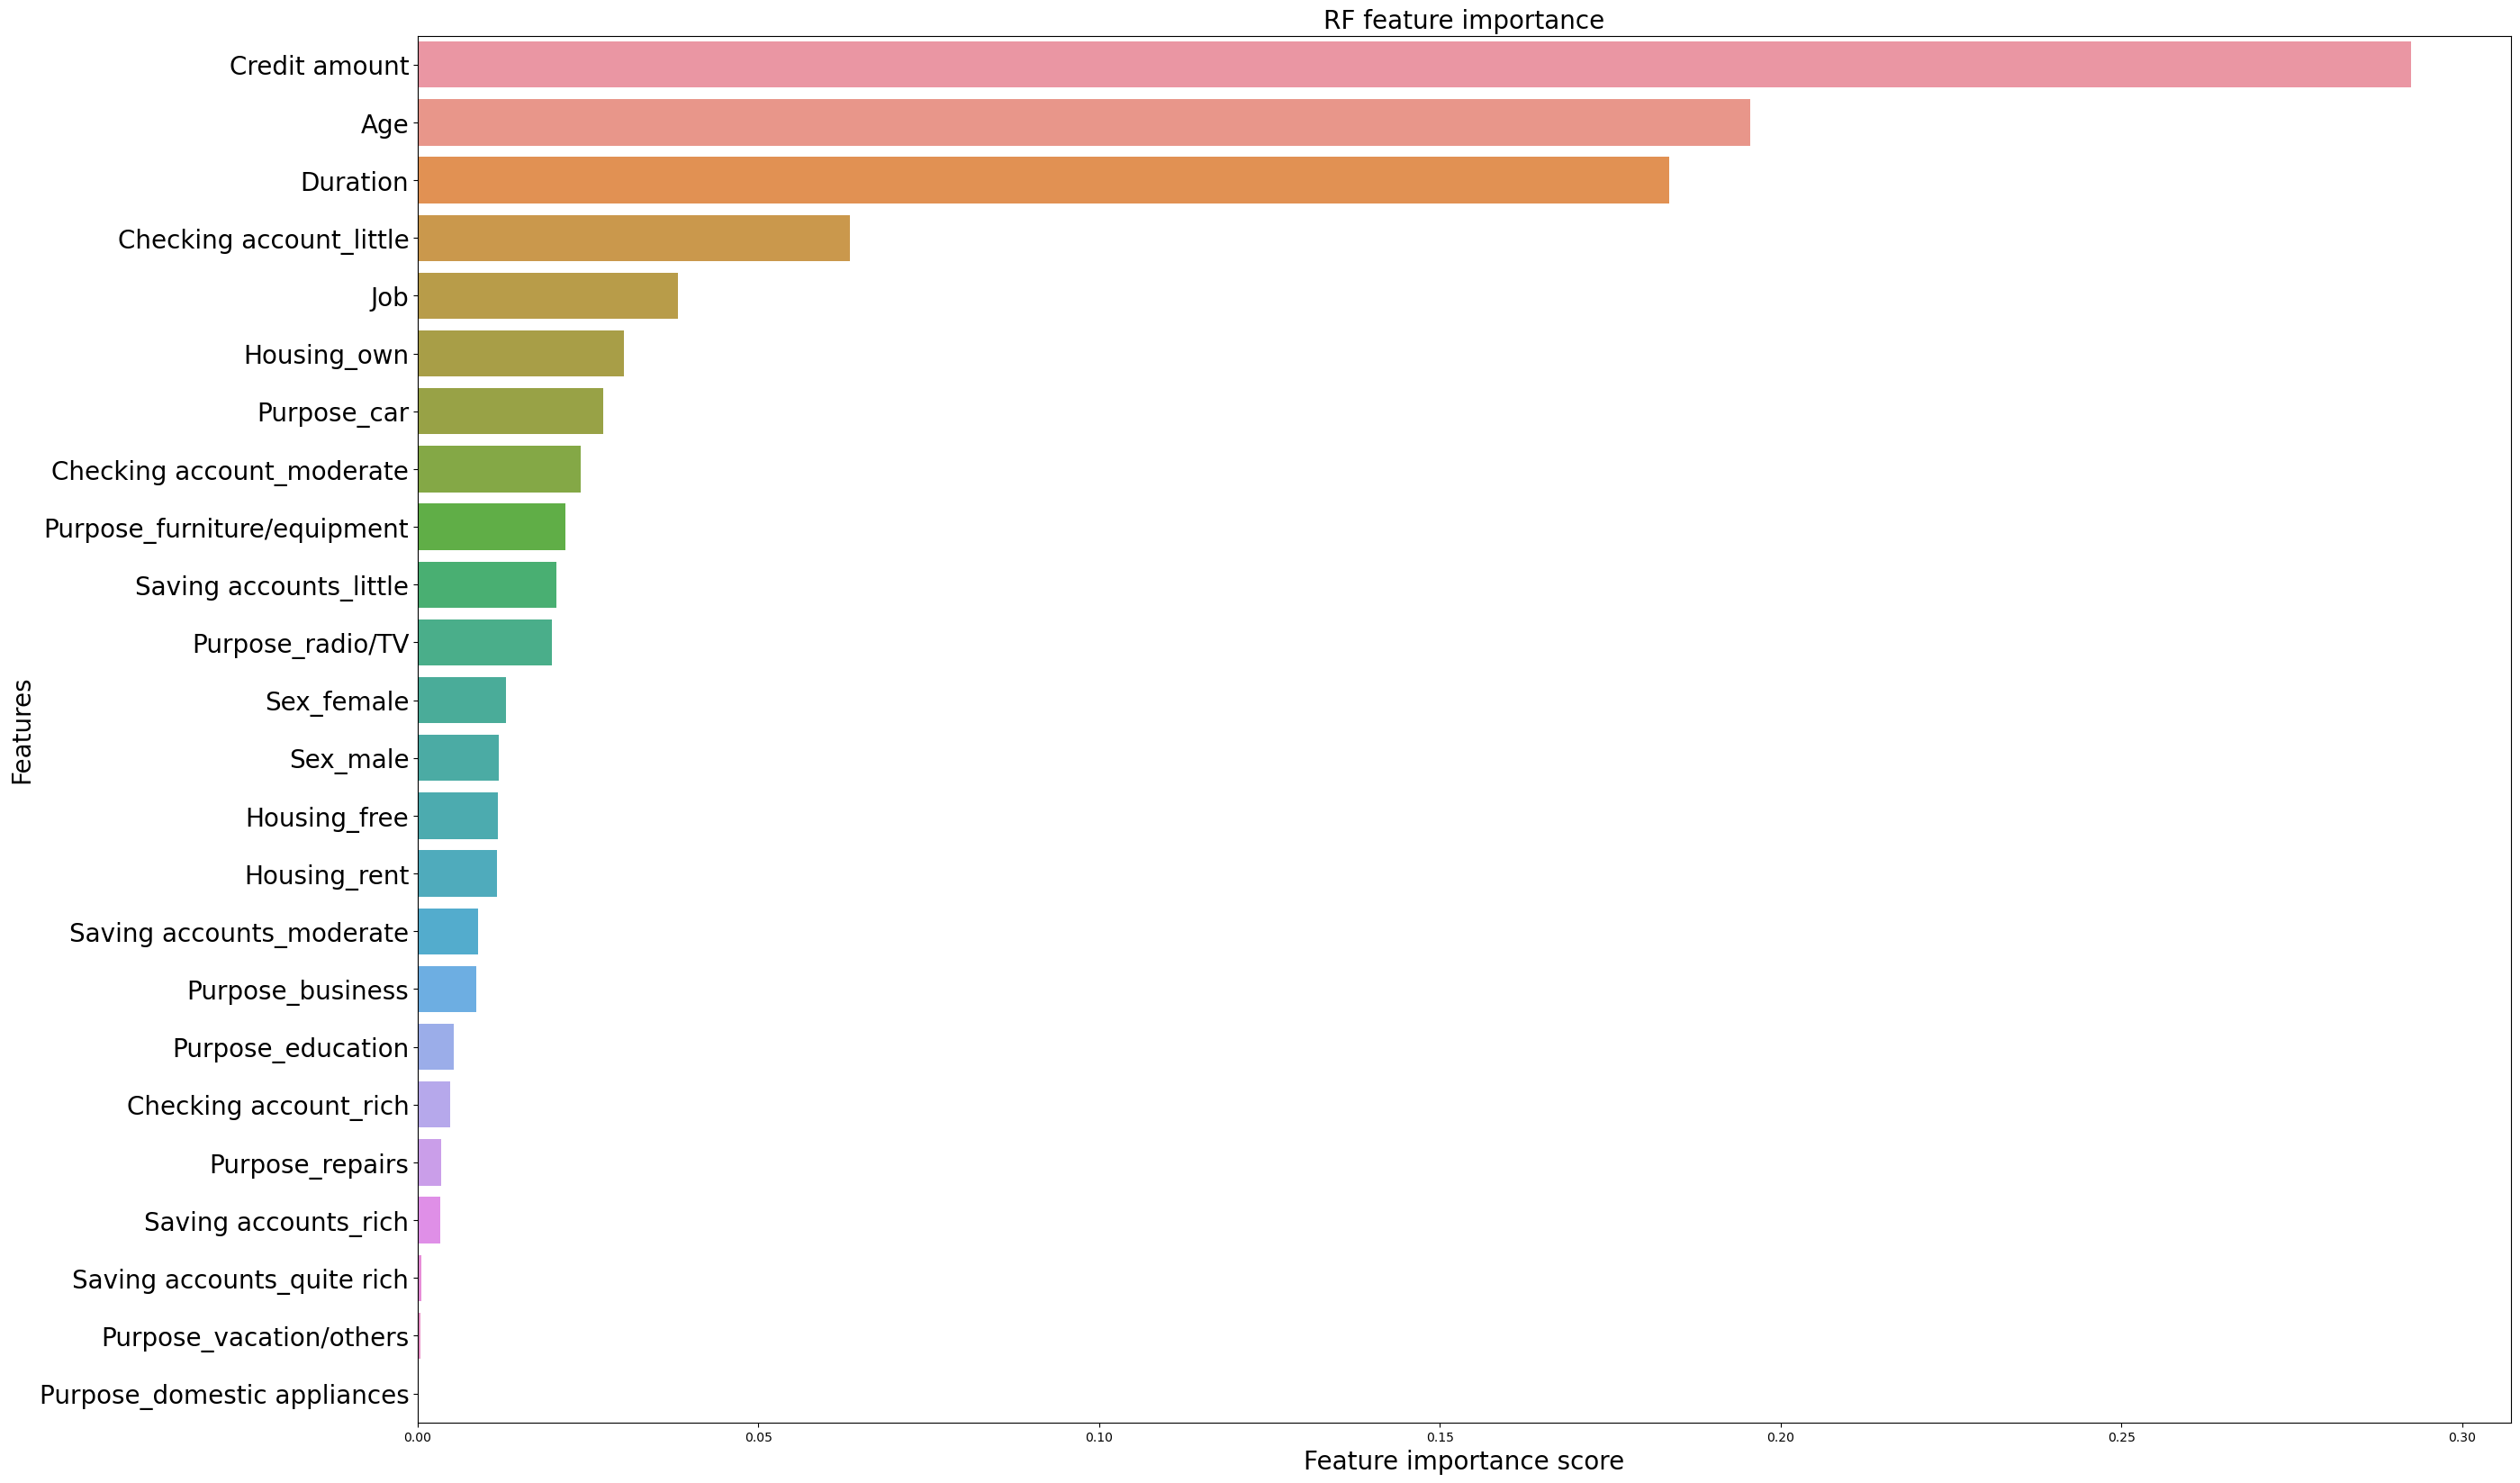

In [119]:
# Return, save and plot the feature importances from the optimal RF classifier 

feature_scores = pd.DataFrame(rf_opt.feature_importances_, 
                              index=X_train.columns, 
                              columns=['Importance'])
feature_scores.sort_values(by='Importance', ascending=False, inplace=True)

f, ax = plt.subplots(figsize=(30, 20))
ax = sns.barplot(x='Importance', y=feature_scores.index, data=feature_scores)
ax.set_title("RF feature importance", size = 20)
ax.set_yticklabels(feature_scores.index, size = 20)
ax.set_xlabel("Feature importance score", size = 20)
ax.set_ylabel("Features", size = 20)
plt.show()

In [ ]:
##### COMMENT HERE - What can you infer from this plot? Explain briefly 
# From this plot we can see which column (feature) has the most affect in the prediction of our Random Forest model.

#### Compare the models

In [120]:
#### COMMENT HERE - Briefly conduct a comparison between the classifiers based on their performances. 
# Which model would you select and why?  

print("SVC:","\n",metrics.classification_report(y_test,y_pred_svc_opt),"\n"*2)
print("RF:","\n",metrics.classification_report(y_test,y_pred_rf_opt),"\n"*2)

# From the print functions we can see that a Random Forest has a higher F1-Score, which means that has better
# predictability and precision. So we choose RF. 

SVC: 
               precision    recall  f1-score   support

           0       0.50      0.20      0.29        90
           1       0.73      0.91      0.81       210

    accuracy                           0.70       300
   macro avg       0.61      0.56      0.55       300
weighted avg       0.66      0.70      0.65       300
 


RF: 
               precision    recall  f1-score   support

           0       0.58      0.37      0.45        90
           1       0.77      0.89      0.82       210

    accuracy                           0.73       300
   macro avg       0.67      0.63      0.64       300
weighted avg       0.71      0.73      0.71       300
 




### Unsupervised Learning

Just for the needs of today’s midterm, we will only work with the **scaled X_train** set in the Unsupervised Learning part

#### Principal Component Analysis (PCA) 

In [148]:
# Just for the needs of today’s midterm, we will only work with the scaled X_train set in the Unsupervised Learning part
# Do NOT use the X_test for simplicity. 

# Instantiate a PCA object using just 2 Principal Components. Fit and transform it on your scaled train set. 
# Calculate and save the PCA scores in a new variable for further analysis. 
# It is recommended to convert/cast the new variable that contains the PCA scores into a DataFrame (for ease of plotting).

pca = PCA(n_components=2)

pc_scores = pca.fit_transform(X_train)
pc_scores = pd.DataFrame(X_train_scores, columns = ['PC1','PC2'])
pc_scores.head()

,PC1,PC2
0,1.00,2.46
1,-1.80,-0.23
2,-0.94,-1.17
3,-1.23,-2.59
4,-1.25,-0.98


In [150]:
# Print the explained variance for each Principal Component
exp_var = [i*100 for i in pca.explained_variance_ratio_]
cum_var = np.cumsum(pca.explained_variance_ratio_*100)

In [151]:
# Print the cumulative variance for each Principal Component
pca_var = pd.DataFrame(data={'exp_var': exp_var, 'cum_var': cum_var}, index=['PC1','PC2'])
pca_var

,exp_var,cum_var
PC1,10.83,10.83
PC2,9.47,20.30


#### k-means clustering 

If you get stuck with PCA, perform k-means on the scaled X_train set directly.

C:\Programs\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Programs\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Programs\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Programs\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

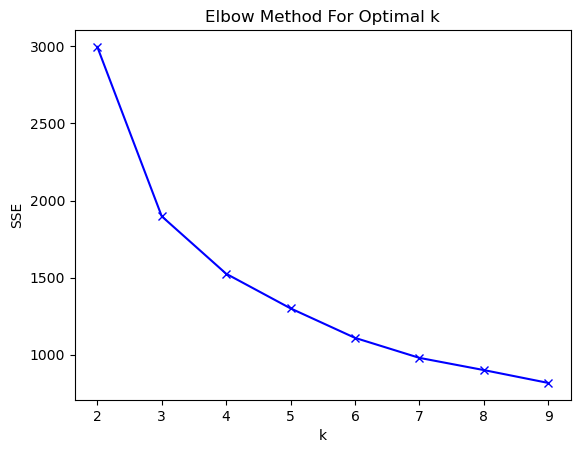

In [156]:
# Plot and use the Elbow rule on the PCA scores to find the optimal number of centroids for kmeans in the range between 2 and 10. 
# Ideally, set the random_state=1 in your KMeans() instantiation. 
# If you get stuck with PCA, perform k-means on the scaled X_train set directly.

km = KMeans(n_clusters = 2,random_state=1)
km.fit(pc_scores) 

cluster_assignment = km.labels_
cluster_assignment


Sum_of_squared_distances = [] 
K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pc_scores)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()


In [161]:
# Instantiate a k-means clustering object using the optimal clusters detected from the Elbow rule. 
# Fit it to the PCA scores output calculated from the previous PCA section. 
# Get back the cluster assignments for each sample and store them as a new column ‘cluster’ in your PCA scores DataFrame 
# from the previous PCA section (this helps with your plotting). 

# (Note: if you get stuck with PCA, perform k-means on the scaled X_train set directly).

opt_k = 4 # From the graph above
kmodel = KMeans(n_clusters=opt_k)
kmodel.fit(X_train)
cluster_assignment = kmodel.labels_
cluster_assignment

pc_scores["cluster"] = cluster_assignment
pc_scores.head(10)

C:\Programs\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,PC1,PC2,cluster
0,1.00,2.46,2
1,-1.80,-0.23,1
2,-0.94,-1.17,1
3,-1.23,-2.59,0
4,-1.25,-0.98,1
5,1.31,0.78,2
6,-1.48,1.00,3
7,-0.26,0.81,1
8,0.35,0.67,1
9,-0.62,0.11,0


Text(0.5, 1.0, 'Clusters')

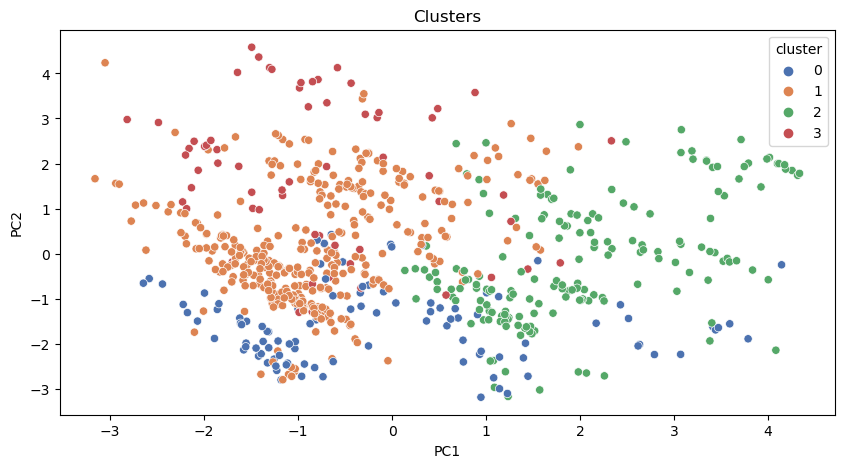

In [163]:
# Create a scatterplot of the 2 Principal Components (PC scores) using as color the k-means cluster information 

plt.figure(figsize=(10,5))
sns.scatterplot(x='PC1', y='PC2', data=pc_scores, hue="cluster",palette="deep") .set_title('Clusters')